In [1]:
import sklearn

import numpy as np
import pandas as pd

# plots
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data_raw = pd.read_csv('../data/data.csv')
train = pd.read_csv('../data/train_balnced_no_test.csv')
test = pd.read_csv('../data/test_umbalanced.csv')

<AxesSubplot:>

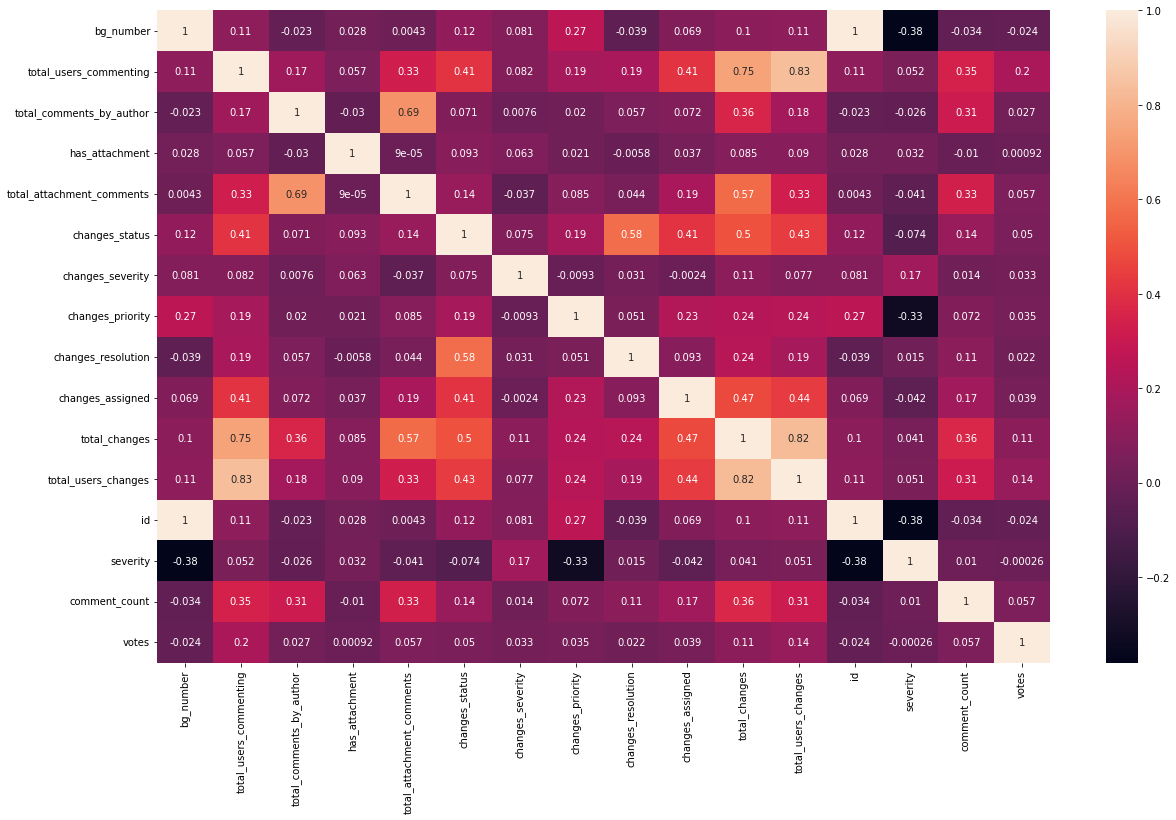

In [13]:
fig, ax = plt.subplots(figsize=(20, 12))

sns.heatmap(data_raw.corr(), ax=ax, annot=True)

In [15]:
data_corr = data_raw.copy()

# Select the numeric features
numeric_features = ['total_users_commenting', 'total_comments_by_author', 'total_attachment_comments', 'total_changes', 'total_users_changes', 'comment_count', 'votes']

# Select the non-numeric features
non_numeric_features = ['description', 'has_attachment', 'changes_status', 'changes_severity', 'changes_priority', 'changes_resolution', 'changes_assigned', 'id', 'summary', 'severity', 'platform', 'priority', 'resolution', 'status', 'version', 'type', 'product', 'component', 'creator', 'op_sys', 'flags', 'creation_time', 'last_change_time', 'assigned_to']

# Calculate the correlation for numeric features
numeric_correlation = data_corr[numeric_features].corr()

# One-hot encode the non-numeric features
encoded_data = pd.get_dummies(data_raw[non_numeric_features])

# Calculate the correlation between numeric and encoded non-numeric features
combined_data = pd.concat([data_raw[numeric_features], encoded_data], axis=1)
combined_correlation = combined_data.corr()

# Display the correlation matrices
print("Correlation for numeric features:")
print(numeric_correlation)

print("\nCorrelation between numeric and encoded non-numeric features:")
print(combined_correlation)

In [ ]:
# filing the null values whit empty string
# making features from textual data

data_raw['description'].fillna('', inplace=True)
data_raw['total_words_desc'] = data_raw.apply(lambda row: len(list(tokenize(row['description']))), axis=1)

data_raw['summary'].fillna('', inplace=True)
data_raw['total_words_summary'] = data_raw.apply(lambda row: len(list(tokenize(row['summary']))), axis=1)


In [5]:
# Specify the file path
file_path ='../data/bg_results.csv'

# Define the column names
column_names = ['bg_number', 'total_users_commenting', 'total_comments_by_author', 'description', 'has_attachment', 'total_attachment_comments', 'changes_status', 'changes_severity', 'changes_priority', 'changes_resolution', 'changes_assigned', 'total_changes', 'total_users_changes', 'id', 'summary', 'severity', 'platform', 'priority', 'resolution', 'status', 'comment_count', 'version', 'type', 'product', 'component', 'creator', 'op_sys', 'votes', 'flags', 'creation_time', 'last_change_time', 'assigned_to']

# Read the data into a pandas DataFrame
data = pd.read_csv(file_path, sep='§', names=column_names, quoting=3)

# Display the DataFrame
print(data.head())

/tmp/ipykernel_234574/4262782779.py:8: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, sep='§', names=column_names, quoting=3)


   bg_number  total_users_commenting  total_comments_by_author  \
0  bg_number  total_users_commenting  total_comments_by_author   
1    1186296                       1                         1   
2    1120863                      13                         1   
3     883851                       4                         6   
4     925322                       2                         3   

                                         description  has_attachment  \
0                                        description  has_attachment   
1  To implement the new security model[1] we want...           False   
2  STR:\n* Wait for an update to be pending.\n* D...           False   
3  Bug to track the localization of the Firefox O...           False   
4  Controls disappear in panels on GNU/Linux.\n\n...            True   

   total_attachment_comments  changes_status  changes_severity  \
0  total_attachment_comments  changes_status  changes_severity   
1                          0          

In [6]:
len(column_names)

32